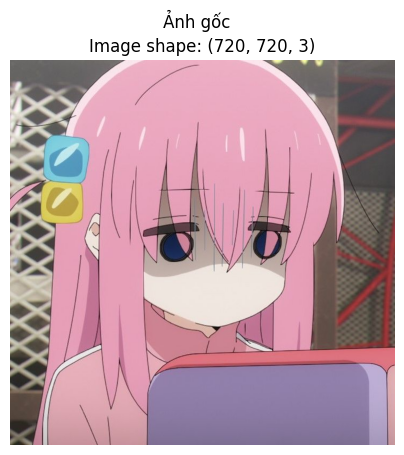

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

link_img = "https://i.pinimg.com/1200x/cc/80/f3/cc80f38579887963c2d71d7060081ea3.jpg"
response = requests.get(link_img)
img = Image.open(BytesIO(response.content))
img_arr = np.array(img)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.suptitle("Ảnh gốc")
plt.title("Image shape: %s"%str(img_arr.shape))
plt.axis("off")
plt.show()

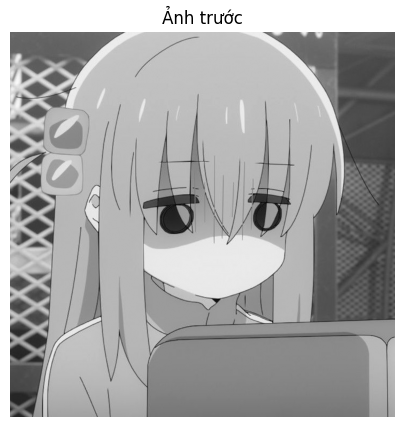

In [2]:
# Chuyển sang ảnh xám
img_xam = np.array(img.convert("L"))

plt.figure(figsize=(5,5))
plt.imshow(img_xam, cmap="gray")
plt.title("Ảnh trước")
plt.axis("off")
plt.show()

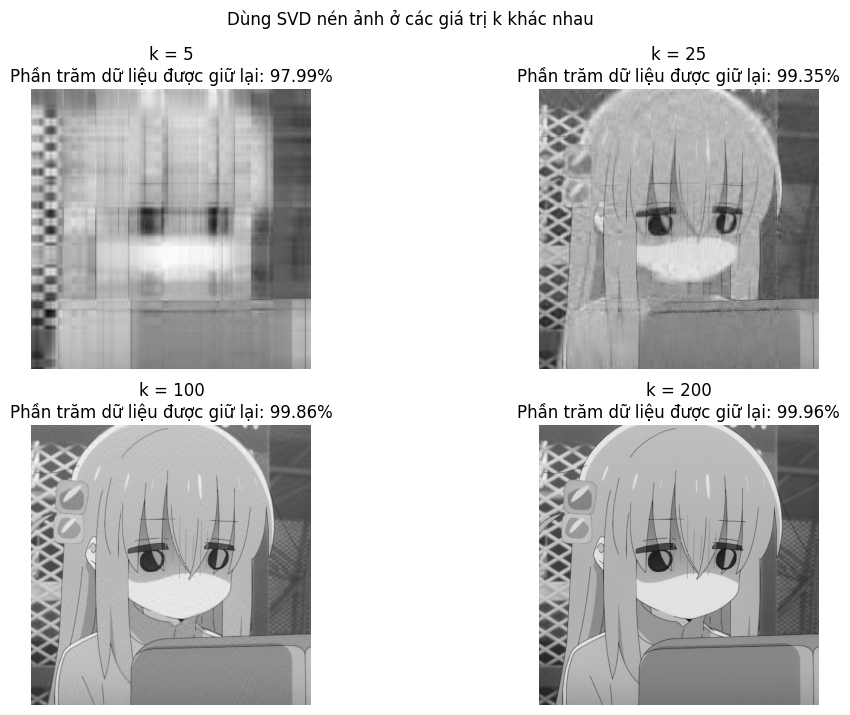

In [3]:
# SVD
U, S, VT = np.linalg.svd(img_xam, full_matrices=False)

ks = [5, 25, 100, 200]

plt.figure(figsize=(12,8))

for i, k in enumerate(ks):
    img_k = U[:, :k] @ np.diag(S[:k]) @ VT[:k, :]

    ratio_k = np.sum(S[:k]**2) / np.sum(S**2)

    plt.subplot(2, 2, i+1)
    plt.imshow(img_k, cmap="gray")
    plt.title(f"k = {k}\nPhần trăm dữ liệu được giữ lại: {ratio_k*100:.2f}%")
    plt.axis("off")

plt.suptitle("Dùng SVD nén ảnh ở các giá trị k khác nhau")
plt.show()